In [262]:
import pandas as pd
import numpy as np

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets
from scipy.stats import skew
sns.set()
%matplotlib inline

In [265]:
df = pd.read_csv('abalone.csv')

In [266]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [267]:
header_names=['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']
df = pd.read_csv('abalone.csv',header=None,skiprows=0,names=header_names)

In [268]:
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole weight      4177 non-null float64
shucked weight    4177 non-null float64
viscera weight    4177 non-null float64
shell weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [270]:
df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [271]:
nf=df.select_dtypes(include=[np.number]).columns
cf=df.select_dtypes(include=[np.object]).columns

In [272]:
nf

Index(['length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [273]:
cf

Index(['sex'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000087CF7ED148>,
      dtype=object)

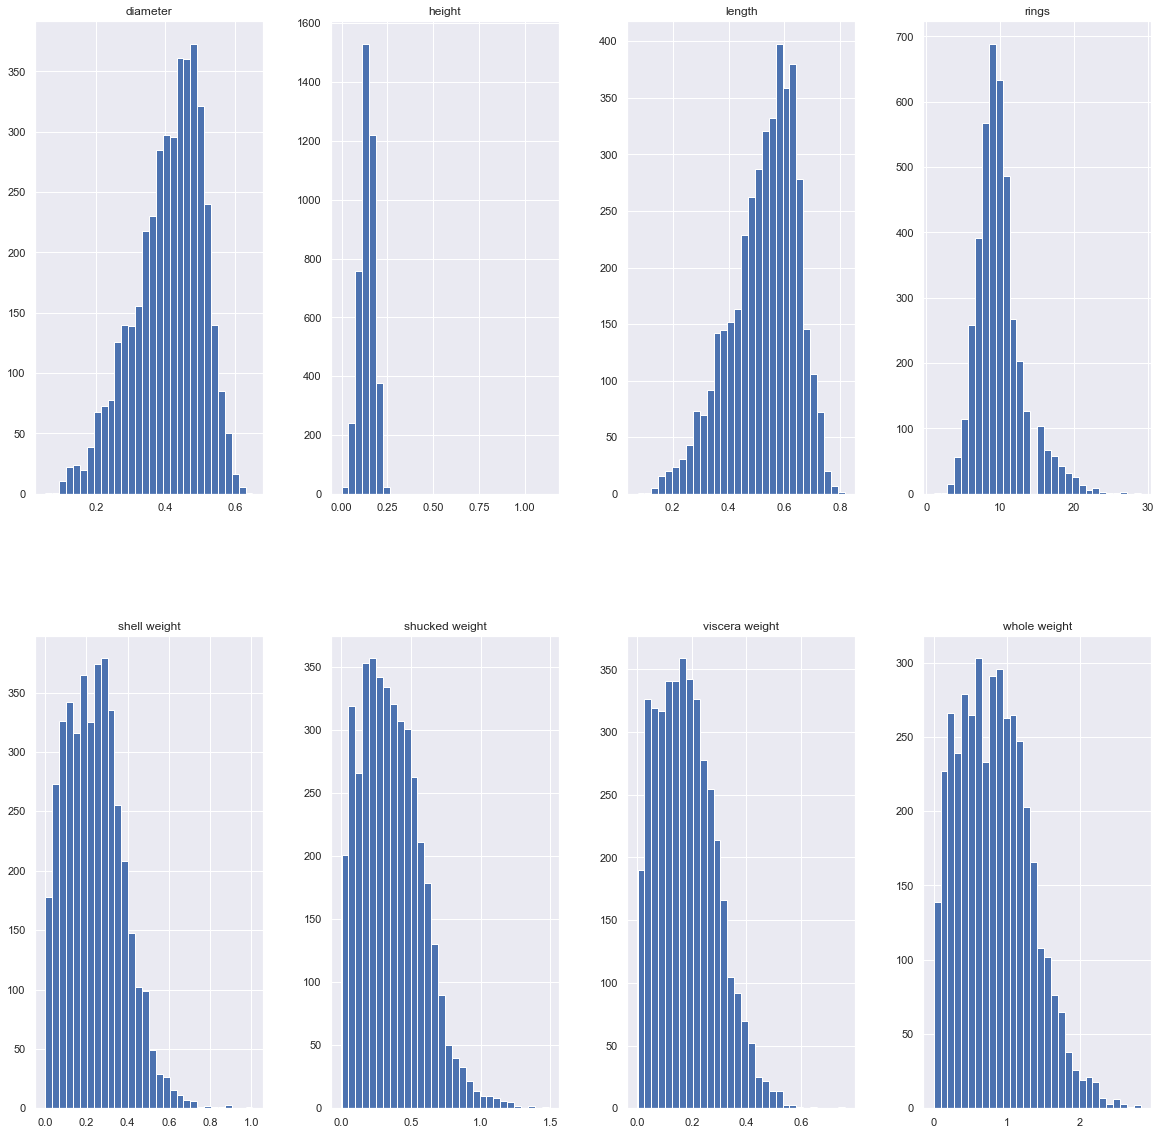

In [274]:
df.hist(figsize=(20,20),grid=True, layout=(2,4),bins=30)

In [275]:
skew_list=skew(df[nf],nan_policy='omit')

In [276]:
skew_list_df=pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis=1)

In [277]:
skew_list_df.sort_values(by='Skewness',ascending=False)

,Features,Skewness
2,height,3.127694
7,rings,1.113702
4,shucked weight,0.718840
6,shell weight,0.620704
5,viscera weight,0.591640
3,whole weight,0.530768
1,diameter,-0.608979
0,length,-0.639643


In [278]:
mv_df=df.isnull().sum().sort_values(ascending=False)

In [279]:
pmv_df=(mv_df/len(df))*100

In [280]:
missing_df=pd.concat([mv_df,pmv_df],axis=1,keys=['Missing Values','%Missing'])

In [281]:
missing_df

,Missing Values,%Missing
rings,0,0.0
shell weight,0,0.0
viscera weight,0,0.0
shucked weight,0,0.0
whole weight,0,0.0
height,0,0.0
diameter,0,0.0
length,0,0.0
sex,0,0.0


In [282]:
print("Value Count of Rings Column")
print(df.rings.value_counts())
print("\nPercentage of Rings Column")
print(df.rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: rings, dtype: float64


In [283]:
print(len(df.rings.unique()))

28


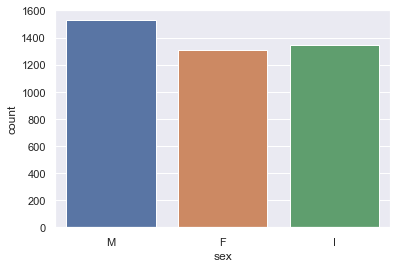

In [284]:
sns.countplot(x='sex', data = df)

In [285]:
print("\nSex Count in Percentage")
print(df.sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: sex, dtype: int64


In [286]:
df['age'] = df['rings'] + 1.5
df['age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

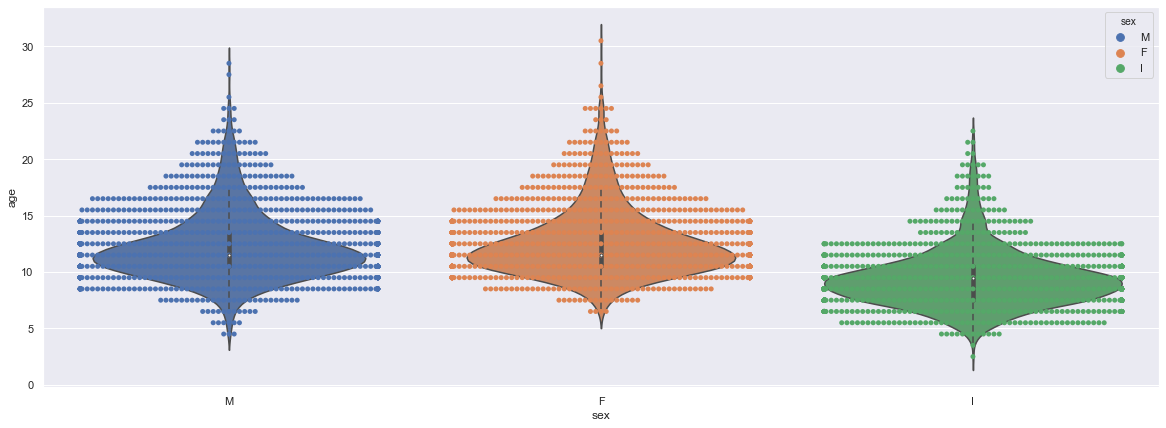

In [287]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'sex', y = 'age', data = df, hue = 'sex')
sns.violinplot(x = 'sex', y = 'age', data = df)

In [288]:
df.groupby('sex')[['length', 'diameter', 'height', 'whole weight', 
                   'shucked weight','viscera weight', 'shell weight', 'age']].mean().sort_values(by = 'age',ascending = False)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [289]:
df['sex'] = LabelEncoder().fit_transform(df['sex'].tolist())

In [290]:
transformed_sex_feature = OneHotEncoder().fit_transform(df['sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [291]:
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age,sex_0,sex_1,sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


In [292]:
Xtrain = df.drop(['rings','age','sex'], axis = 1)
Ytrain = df['rings']

In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [294]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [295]:
result_acc

0.25525743292240755

In [296]:
df['newrings'] = np.where(df['rings'] > 15,1,0)

In [297]:
Xtrain = df.drop(['newrings','rings','age','sex'], axis = 1)
Ytrain = df['newrings']

In [298]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [299]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [300]:
result_acc

0.9448875997099347